In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.externals import joblib
from sklearn import metrics
import pickle
%matplotlib inline

In [2]:
#Read Data
#data = pd.read_csv('../../RealData/RealData_Small.csv')
data = pd.read_csv('../../SynData/data/GeneratedLogData.csv')


In [3]:
#General data info
data.head()

,Unnamed: 0,CPU,throughput
0,0,0.426030,51.200421
1,1,8.698659,327.778529
2,2,4.051091,233.659501
3,3,7.534203,309.325636
4,4,0.658634,72.999572


In [4]:
data.describe()

,Unnamed: 0,CPU,throughput
count,1000.000000,1000.000000,1000.000000
mean,499.500000,4.891931,231.722106
std,288.819436,2.950791,91.176693
min,0.000000,0.000062,0.008968
25%,249.750000,2.301440,172.309523
50%,499.500000,4.968995,257.748757
75%,749.250000,7.478526,308.381351
max,999.000000,9.972463,345.581544


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
Unnamed: 0    1000 non-null int64
CPU           1000 non-null float64
throughput    1000 non-null float64
dtypes: float64(2), int64(1)
memory usage: 23.5 KB


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


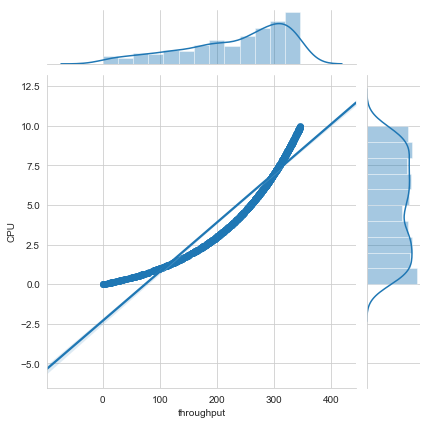

In [6]:
sns.set_style('whitegrid')
sns.jointplot(x=data['throughput'],y=data['CPU'],kind="reg")


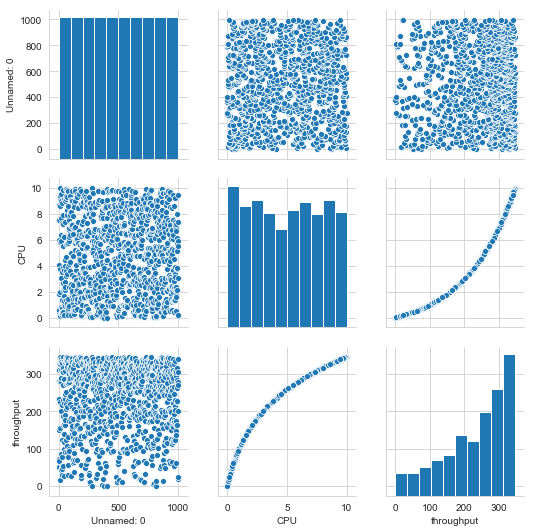

In [7]:
sns.pairplot(data)


In [8]:
data['throughput'].corr(data['CPU'])


0.9612127110602322

In [9]:
datalm = data


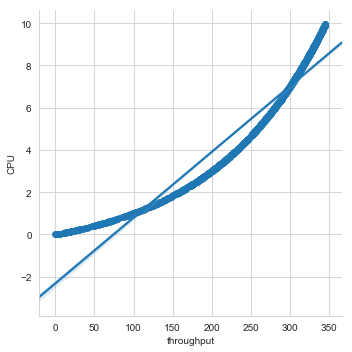

In [10]:
sns.lmplot(x='throughput',y='CPU',data=datalm)


In [11]:
#Training and Testing Data
X = data[['throughput']]
y = data['CPU']
X = X.fillna(X.mean())
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X)
X = scaler.transform(X)
scaler_filename = "syntheticScaler.save"
joblib.dump(scaler, scaler_filename) 
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)
lm = LinearRegression()
n = len(X)
kf = KFold(n_splits=5)
fold = 0
for train_index, test_index in kf.split(X):
    fold += 1
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
lm.fit(X_train,y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
#Test data prediction
prediction = lm.predict(X_test)
X_test = np.array(X_test)
y_test = np.array(list(y_test))
prediction= np.array(prediction)
df = pd.DataFrame({'Throuput':X_test.flatten(),'Actual_CPU': y_test.flatten(), 'Predicted_CPU': prediction.flatten()})
df

,Throuput,Actual_CPU,Predicted_CPU
0,0.755887,5.114467,5.822862
1,0.619980,3.415482,4.367533
2,0.358624,1.360995,1.568850
3,0.818736,6.107867,6.495871
4,0.781352,5.499039,6.095548
5,0.740902,4.898885,5.662396
6,0.525464,2.520909,3.355422
7,0.930956,8.299924,7.697559
8,0.566970,2.888958,3.799888
9,0.905101,7.741442,7.420696


Text(0, 0.5, 'Predicted Y')

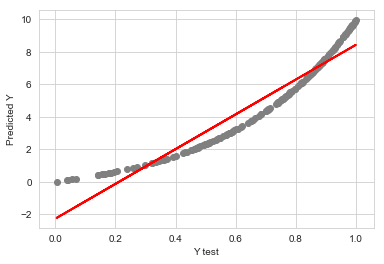

In [13]:
#Plot prediction
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, prediction, color='red', linewidth=2)
plt.xlabel("Y test")
plt.ylabel("Predicted Y")


In [14]:
#Model Evaluation
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))


MAE: 0.675626258414095
MSE: 0.6268206058861877
RMSE: 0.7917200299892555


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


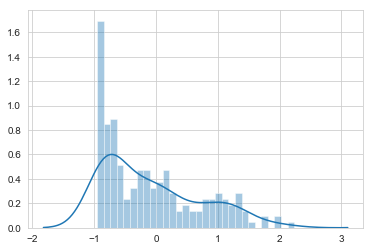

In [15]:
#Residuals
sns.distplot(y_test-prediction,bins=30)

In [16]:
# save the model to disk
filename = '../models/linearReg_model.sav'
pickle.dump(lm, open(filename, 'wb'))

In [38]:
data = scaler.transform(np.float32([[240]])) 
print(data)

[[0.6944736]]


In [39]:
lm.predict(data)

array([5.16523222])